In [1]:
! pip install 'cebra[dev,demos]' 

In [10]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib as jl
from scipy.integrate import solve_ivp
import matplotlib.gridspec as gridspec
#import cebra.datasets
import cebra
from cebra import CEBRA
import d_library as dl
import sklearn.linear_model
from matplotlib.animation import FuncAnimation

from matplotlib.collections import LineCollection
import pandas as pd

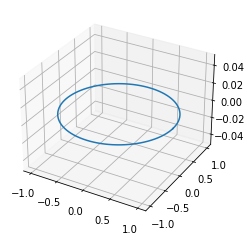

(100, 3)

In [3]:
%matplotlib inline
circle = dl.make_circle()
dl.plot_circle(circle[:,0], circle[:,1])
circle.shape

In [4]:
xyz = dl.make_lorenz()

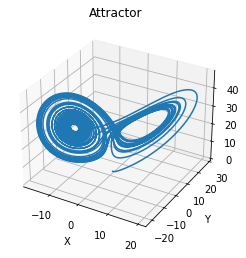

In [5]:
dl.plot_lorenz(xyz)

In [6]:
new_lorenz = np.transpose(xyz)

In [18]:
cebra_model = CEBRA(
    model_architecture="offset1-model-mse",
    batch_size=512,
    learning_rate=0.01,
    max_iterations=2000,
    delta=0.1,
    conditional='time',
    output_dimension=3,
    distance='euclidean',
    device="cuda_if_available",
    num_hidden_units=64,
    verbose=True,
)

In [19]:
embedding = cebra_model.fit_transform(new_lorenz)

pos: -15022609989223676116992.0000 neg:  50883343929093245632512.0000 total:  35860733939869569515520.0000 temperature:  1.0000: 100%|██████████| 2000/2000 [00:25<00:00, 77.52it/s]  


<Axes3D: title={'center': 'Embedding'}>

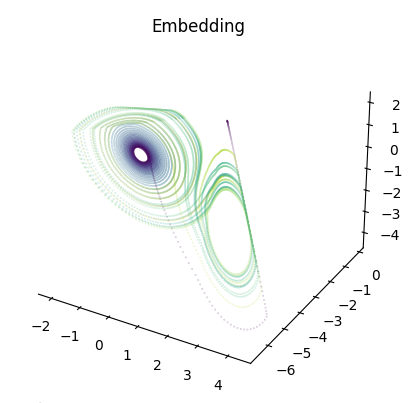

In [20]:
cebra.plot_embedding(embedding, embedding_labels='time')